#🔁 Comparativo Rápido

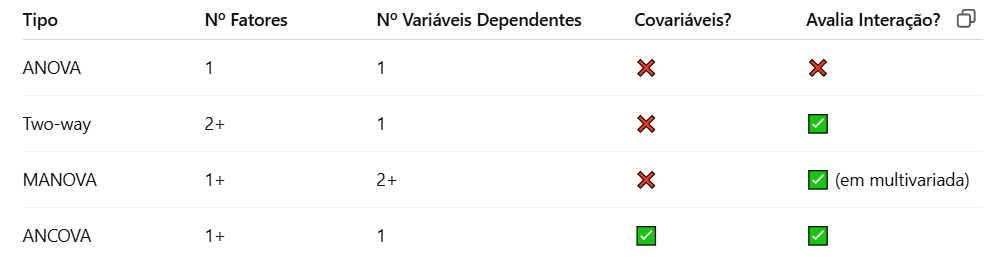

# 📈 One-way ANOVA (Analysis of variance)

Esse teste verificar se ao menos uma das médias é diferente

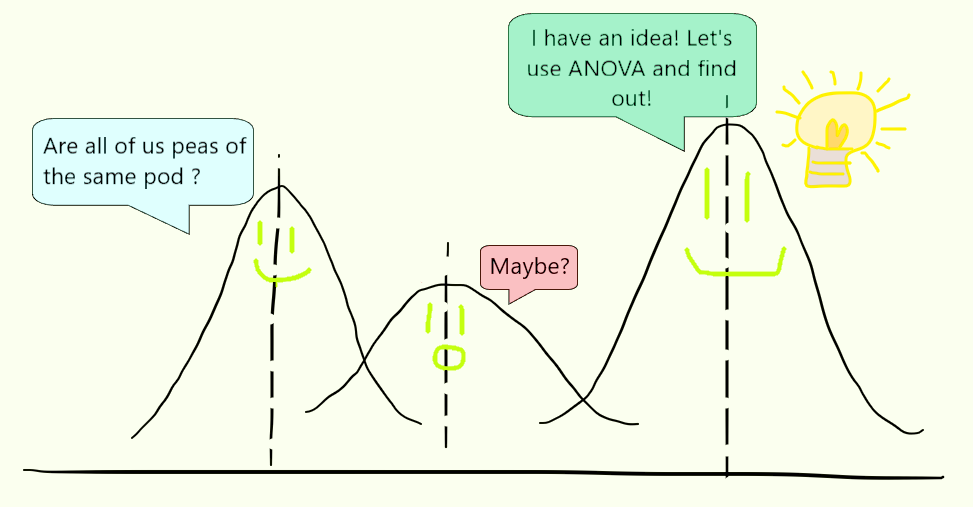

**🎯 Cenário:**

Você está analisando o tempo médio de espera em três Unidades Básicas de Saúde (UBS) diferentes.
Queremos responder:

"Há diferença significativa entre os tempos médios de espera nas três UBS?"

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Cenário: queremos comparar o tempo médio de espera entre 3 Unidades Básicas de Saúde (UBS)

np.random.seed(42)

# UBS 1: média de 25 minutos
ubs1 = np.random.normal(loc=25, scale=2, size=30)

# UBS 2: média de 27 minutos
ubs2 = np.random.normal(loc=27, scale=2, size=30)

# UBS 3: média de 30 minutos
ubs3 = np.random.normal(loc=30, scale=2, size=30)

# Criar DataFrame com os dados combinados
df_anova_exemplo = pd.DataFrame({
    "Tempo_Espera_min": np.concatenate([ubs1, ubs2, ubs3]),
    "UBS": ["UBS 1"] * 30 + ["UBS 2"] * 30 + ["UBS 3"] * 30
})

In [ ]:
df_anova_exemplo

,Tempo_Espera_min,UBS
0,25.993428,UBS 1
1,24.723471,UBS 1
2,26.295377,UBS 1
3,28.046060,UBS 1
4,24.531693,UBS 1
...,...,...
85,28.996486,UBS 3
86,31.830804,UBS 3
87,30.657502,UBS 3
88,28.940480,UBS 3


#### 🧪 Especifique as Hipóteses

* H0: As médias dos tempos de espera são iguais entre as UBS
* H1: Pelo menos uma média é diferente

#### ✏️ Passo 2 – Defina o Nível de Significância

* Vamos adotar α = 0,05 (5%)
* Isso significa que aceitamos 5% de chance de rejeitar H₀ mesmo que ela seja verdadeira (erro tipo I)

In [ ]:
alpha = 0.05

####🧮 Passo 3 – Escolha o Teste Adequado

Três amostras independentes, variável contínua, variâncias homogêneas → One-way ANOVA

####📏 Passo 4 – Calcule a Estatística de Teste / Valor-p

In [ ]:
grupo1 = df_anova_exemplo[df_anova_exemplo["UBS"] == "UBS 1"]["Tempo_Espera_min"]
grupo1.head(3)

,Tempo_Espera_min
0,25.993428
1,24.723471
2,26.295377


In [ ]:
grupo2 = df_anova_exemplo[df_anova_exemplo["UBS"] == "UBS 2"]["Tempo_Espera_min"]
grupo2.head(3)

,Tempo_Espera_min
30,25.796587
31,30.704556
32,26.973006


In [ ]:
grupo3 = df_anova_exemplo[df_anova_exemplo["UBS"] == "UBS 3"]["Tempo_Espera_min"]
grupo3.head(3)

,Tempo_Espera_min
60,29.041652
61,29.628682
62,27.787330


<Figure size 800x600 with 0 Axes>

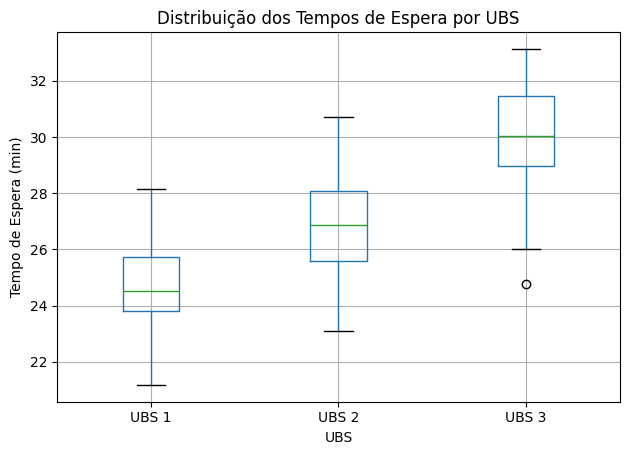

In [ ]:
import matplotlib.pyplot as plt

# Gráfico comparando as distribuições de tempo por grupo
plt.figure(figsize=(8, 6))
df_anova_exemplo.boxplot(column="Tempo_Espera_min", by="UBS", grid=True)
plt.title("Distribuição dos Tempos de Espera por UBS")
plt.suptitle("")  # remover o título automático do pandas
plt.xlabel("UBS")
plt.ylabel("Tempo de Espera (min)")
plt.tight_layout()
plt.show()

Aqui está o boxplot dos tempos de espera por UBS, representando visualmente a distribuição dos três grupos:

* UBS 1: menor tempo de espera
* UBS 2: intermediário
* UBS 3: maior tempo de espera

A diferença entre as medianas e as distribuições já sugere que há diferença entre os grupos, o que foi confirmado pela ANOVA.

In [ ]:
from scipy.stats import f_oneway

In [ ]:
f_stat, p_valor = f_oneway(grupo1, grupo2, grupo3)

In [ ]:
f_stat, p_valor

(np.float64(62.59394868097508), np.float64(1.4346335605028173e-17))

####📈 Passo 5 – Interprete os Resultados

Como p < 0,05, rejeitamos H₀

Há diferença estatística significativa entre os tempos médios de espera nas três UBS

# 📊 Post-hoc (Tukey HSD)

Se a ANOVA rejeitou H₀, usamos o teste de Tukey para saber **quais pares de grupos são diferentes**

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
tukey = pairwise_tukeyhsd(endog=df_anova_exemplo['Tempo_Espera_min'], groups=df_anova_exemplo['UBS'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
 UBS 1  UBS 2    2.134 0.0001 0.9743 3.2937   True
 UBS 1  UBS 3   5.4021    0.0 4.2424 6.5617   True
 UBS 2  UBS 3   3.2681    0.0 2.1084 4.4278   True
--------------------------------------------------


In [ ]:
medias = df_anova_exemplo.groupby("UBS")["Tempo_Espera_min"].agg(["mean", "std", "count"])
medias["sem"] = medias["std"] / np.sqrt(medias["count"])
medias = medias.reset_index()
medias

,UBS,mean,std,count,sem
0,UBS 1,24.623706,1.800013,30,0.328636
1,UBS 2,26.757675,1.862204,30,0.339990
2,UBS 3,30.025770,1.983966,30,0.362221


SEM: É uma medida de quanto a média de uma amostra tende a variar se repetíssemos a coleta de dados várias vezes. É usado para construir barras de erro em gráficos. Quanto menor o SEM, mais confiável é a média como estimativa da média populacional.



In [ ]:
# Definir variáveis usadas no gráfico
x_pos = np.arange(len(medias["UBS"]))
mean_vals = medias["mean"].values
sem_vals = medias["sem"].values
labels = medias["UBS"].values

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Reexecutando o teste de Tukey para obter os p-valores reais
tukey_result = pairwise_tukeyhsd(
    endog=df_anova_exemplo["Tempo_Espera_min"],
    groups=df_anova_exemplo["UBS"],
    alpha=0.05
)

# Organizando os resultados como dicionário para facilitar visualização
tabela_tukey = pd.DataFrame(data=tukey_result.summary().data[1:], columns=tukey_result.summary().data[0])

# Mapeando pares para p-valor real
comparacoes_pvalores = {
    (row['group1'], row['group2']): float(row['p-adj'])
    for _, row in tabela_tukey.iterrows()
}

comparacoes_pvalores

{('UBS 1', 'UBS 2'): 0.0001, ('UBS 1', 'UBS 3'): 0.0, ('UBS 2', 'UBS 3'): 0.0}

#### 📈 Visualização com Comparações Significativas: Barras com erro no Matplotlib

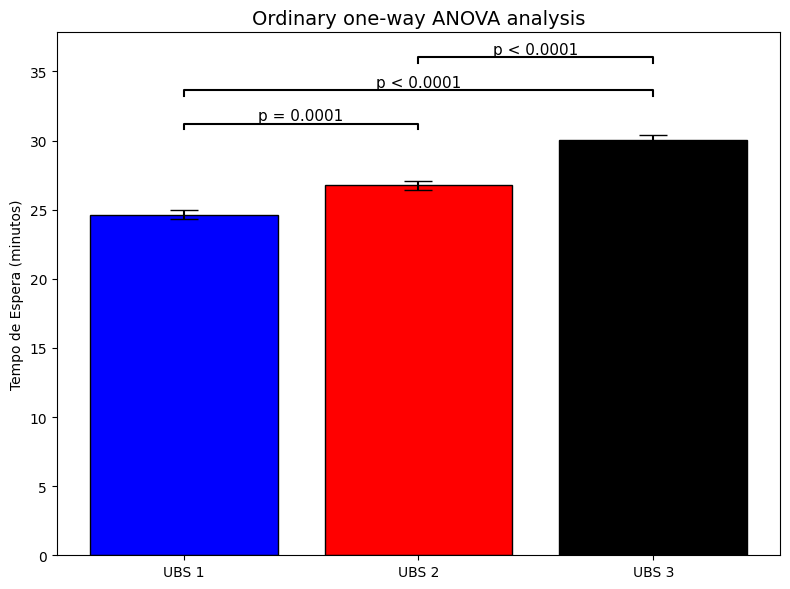

In [ ]:
#Cria uma figura do matplotlib com tamanho 8x6 polegadas.
plt.figure(figsize=(8, 6))

# Barras com erro padrão
#x_pos: posição de cada UBS no eixo X
#mean_vals: altura das barras (média)
#sem_vals: erro padrão (yerr), formando as "barrinhas" no topo
#capsize: largura do "chapéu" nas barras de erro
#tick_label: nomes dos grupos (UBS)
#color: cores das barras
#edgecolor: contorno das barras
plt.bar(x_pos, mean_vals, yerr=sem_vals, capsize=10,
        tick_label=labels, color=["blue", "red", "black"], edgecolor="black")

#Adiciona o rótulo do eixo Y e o título do gráfico.
plt.ylabel("Tempo de Espera (minutos)")
plt.title("Ordinary one-way ANOVA analysis", fontsize=14)


# Alturas escalonadas para clareza
comparacoes = {
    ("UBS 1", "UBS 2"): {"p": comparacoes_pvalores[("UBS 1", "UBS 2")], "altura": 0},
    ("UBS 1", "UBS 3"): {"p": comparacoes_pvalores[("UBS 1", "UBS 3")], "altura": 3},
    ("UBS 2", "UBS 3"): {"p": comparacoes_pvalores[("UBS 2", "UBS 3")], "altura": 6}
}

# Mapeia os rótulos para suas posições e define a base vertical (y) onde as chaves começarão.
positions = dict(zip(labels, x_pos))
base_y = mean_vals.max() + 0.8

for (g1, g2), info in comparacoes.items():
    x1, x2 = positions[g1], positions[g2]
    h_offset = info["altura"] * 0.8
    y = base_y + h_offset
    col = 'black'
    label_text = f"p = {info['p']:.4f}" if info["p"] > 0 else "p < 0.0001"
    plt.plot([x1, x1, x2, x2], [y, y + 0.4, y + 0.4, y], lw=1.5, c=col)
    plt.text((x1 + x2) / 2, y + 0.45, label_text, ha='center', va='bottom', fontsize=11)

#Ajusta o layout e mostra o gráfico.
plt.tight_layout()
plt.show()



#### 📈 Visualização com Comparações Significativas: Box plot no Matplotlib

In [ ]:
import seaborn as sns

<ipython-input-40-8f159e6b6cb1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_anova_exemplo, x="UBS", y="Tempo_Espera_min", palette=["blue", "red", "black"])


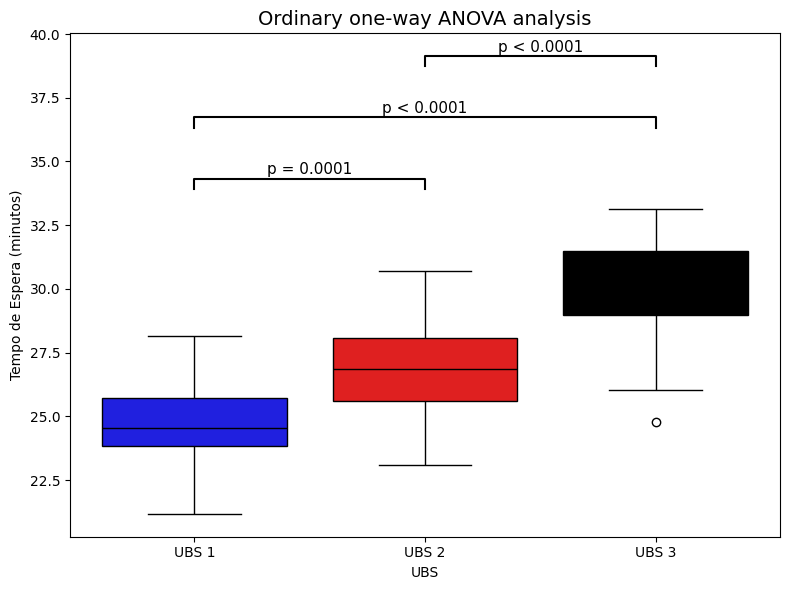

In [ ]:
#Cria nova figura.
plt.figure(figsize=(8, 6))

#Cria um boxplot com o seaborn
sns.boxplot(data=df_anova_exemplo, x="UBS", y="Tempo_Espera_min", palette=["blue", "red", "black"])

plt.ylabel("Tempo de Espera (minutos)")
plt.title("Ordinary one-way ANOVA analysis", fontsize=14)

#Define onde estão as UBS no eixo X e o valor máximo da variável para começar a desenhar as chaves acima do boxplot.
positions = dict(zip(labels, range(len(labels))))
base_y = df_anova_exemplo["Tempo_Espera_min"].max() + 0.8

#Mesma lógica que no gráfico de barras, mas aplicada ao boxplot: cria as chaves entre pares e mostra o p-valor real.
for (g1, g2), info in comparacoes.items():
    x1, x2 = positions[g1], positions[g2]
    h_offset = info["altura"] * 0.8
    y = base_y + h_offset
    col = 'black'
    label_text = f"p = {info['p']:.4f}" if info["p"] > 0 else "p < 0.0001"
    plt.plot([x1, x1, x2, x2], [y, y + 0.4, y + 0.4, y], lw=1.5, c=col)
    plt.text((x1 + x2) / 2, y + 0.45, label_text, ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()
